<a href="https://colab.research.google.com/github/NophaieViscente/PredictSalary/blob/main/PredictSalary_RegressionProblemExample_AED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Predição de Salário - Problema de Regressão
* Este projeto tem por objetivo, efetuar uma predição dos salários para determinados empregos, com base em um conjunto de dados usando o seu texto.
* O projeto será totalmente executado dentro deste Notebook.

# Carregando as bibliotecas necessárias.

* A seguir será efetuado o carregamento das bibliotecas necessárias para uso no projeto.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Carregando os dados.

* A seguir é efetuado o carregamento dos dados para uso no projeto.

In [3]:
train = pd.read_csv(f'/content/drive/MyDrive/Train_rev1.csv')
#test = pd.read_csv(f'/content/drive/MyDrive/Test_rev1.csv')
#valid = pd.read_csv(f'/content/drive/MyDrive/Valid_rev1.csv')
#location = pd.read_csv(f'/content/drive/MyDrive/Location_Tree.csv',header=None)

# AED (Análise Exploratória de Dados)
* Esta parte do projeto destina-se a análise exploratória de dados, parte importante de um projeto de DataScience. Através dessa primeira análise poderemos ter noções sobre o conjunto de dados que estamos trabalhando e também aplicar limpeza e transformação de dados.
 

### Validando as informações dos dataSets.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


* Observa-se que existem 244768 linhas nesse dataSet.
* Pode-se observar que temos vários dados faltantes em algumas colunas, são elas : ContractType, ContractTime e Company.
* Um item faltante em Title.

### Encontrando o item faltante no Cargo.
* Encontrar o indice do item faltante para validar se pode ser adicionado manualmente o cargo.

In [5]:
for indice,conteudo in train.Title.items():
    if type(conteudo) != str :
      print(indice)

1588


In [6]:
train.loc[1588]

Id                                                             48271669
Title                                                               NaN
FullDescription       Quality Improvement Manager North West England...
LocationRaw                                       Liverpool, Merseyside
LocationNormalized                                            Liverpool
ContractType                                                  full_time
ContractTime                                                        NaN
Company                                                             NaN
Category                                      Healthcare & Nursing Jobs
SalaryRaw                                     40,000 to 45,000 per year
SalaryNormalized                                                  42500
SourceName                                               careworx.co.uk
Name: 1588, dtype: object

* Verificado o item de indice 1588, onde o cargo é o 'Quality Improvement Manager'

* Adicionar dados ao indice 1588 

In [7]:
train.loc[[1588],'Title'] = 'Quality Improvement Manager'

* Validar dados adicionados.

In [8]:
train.info(), train.loc[1588]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244768 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


(None, Id                                                             48271669
 Title                                       Quality Improvement Manager
 FullDescription       Quality Improvement Manager North West England...
 LocationRaw                                       Liverpool, Merseyside
 LocationNormalized                                            Liverpool
 ContractType                                                  full_time
 ContractTime                                                        NaN
 Company                                                             NaN
 Category                                      Healthcare & Nursing Jobs
 SalaryRaw                                     40,000 to 45,000 per year
 SalaryNormalized                                                  42500
 SourceName                                               careworx.co.uk
 Name: 1588, dtype: object)

* Verifica-se que fora adicionado o dado.

In [10]:
#test.info()

* Observa-se que existem 122463 linhas nesse dataSet.
* Pode-se observar que temos vários dados faltantes em algumas colunas, são elas : ContractType, ContractTime e Company.

In [11]:
#valid.info()

* Observa-se que existem 40663 linhas nesse dataSet.
* Pode-se observar que temos vários dados faltantes em algumas colunas, são elas : ContractType, ContractTime e Company.

### Verificando duplicidade de dados nos DataSets.

In [12]:
#train.Id.unique().size, test.Id.unique().size, valid.Id.unique().size

* Pode-se verificar que o Id é único em todos os datasets.

### Verificando os dados.
* Usando um histograma para validar a distribuição dos dados do Salário Normalizado

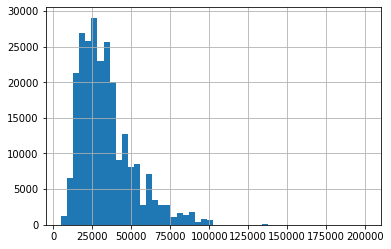

In [9]:
train.SalaryNormalized.hist(bins=50)

# Pré-Processamento de dados.
* Nessa fase iremos preparar os dados para a modelagem, com auxílio de algumas análises.

### Utilizando uma cópia do DataSet.
* Utilizando essa técnica para se caso ocorra um erro apenas recarreguemos o dataset inicial de treino, retornando desse ponto.

In [10]:
df_tmp = train.copy()

### Transformando os dados.
* Transformando os dados de cargos todos em caracteres minúsculos.

In [15]:
#df_tmp.Title = df_tmp.Title.str.lower()

In [11]:
df_tmp.groupby('LocationRaw').count().sort_values(by='SalaryNormalized',ascending=True)

,Id,Title,FullDescription,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
LocationRaw,,,,,,,,,,,
"London, Middlesex, Hertfordshire, Buckinghamshire, Surrey, , Greater London",1,1,1,1,0,0,1,1,1,1,1
Nass,1,1,1,1,1,0,1,1,1,1,1
"National - Midlands, Home Counties, Thames Valley, South",1,1,1,1,0,1,1,1,1,1,1
National Role - Preferably Midlands/North West,1,1,1,1,1,1,1,1,1,1,1
National Role but Ideally based in the North of England,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
City of London - London,2344,2344,2344,2344,2344,2309,2344,2344,2344,2344,2344
City London South East,2843,2843,2843,2843,15,2667,2843,2843,2843,2843,2843
UK,5538,5538,5538,5538,2758,4685,5086,5538,5538,5538,5538


### Conferindo se a coluna 'SalaryRaw' tem algum valor nulo

In [12]:
df_tmp.SalaryRaw.isna().sum()

0

### Criação de novas características

* Criação de lista para alocar os valores de salários. Onde os valores dos salários serão usados para criação de uma possível feature a faixa salarial.

In [70]:
def listasSalaryRange (x) :
  salary_full_list = x.tolist()
  pattern = '[0-9]{1,3}[,.]?[0-9]*'
  p = re.compile(pattern)
  # Criando uma lista apenas com os números.
  onlyDigitSalary = [p.findall(numero) for numero in salary_full_list]
  # Alocando a faixa salarial nas uma listas.
  LowSalaryRange = [salario[:1] for salario in onlyDigitSalary]
  HighSalaryRange = [salario[1:2] for salario in onlyDigitSalary]
  # Validando o tamanho da lista ela deve conter o tamanho do DataSet no eixo y.
  print(len(LowSalaryRange),len(HighSalaryRange) )
  return LowSalaryRange, HighSalaryRange

In [71]:
low, high = listasSalaryRange(df_tmp.SalaryRaw)

244768 244768


* Verificando o formato da lista de faixa salarial

In [44]:
low[:10],high[:10]

([['20000'],
  ['25000'],
  ['20000'],
  ['25000'],
  ['20000'],
  ['20000'],
  ['50000'],
  ['18000'],
  ['18000'],
  ['70000']],
 [['30000'],
  ['35000'],
  ['40000'],
  ['30000'],
  ['30000'],
  ['30000'],
  ['100000'],
  ['26000'],
  ['28000'],
  ['100000']])

* Ajustando a lista de Faixa Salarial

In [82]:
# Alocando a faixa salarial nas colunas
df_tmp['LowSalaryRange'] = low
df_tmp['HighSalaryRange'] = high
# Retirando os colchetes que vieram com a string
df_tmp['LowSalaryRange'] = df_tmp['LowSalaryRange'].str.get(0)
df_tmp['HighSalaryRange'] = df_tmp['HighSalaryRange'].str.get(0)

In [83]:
df_tmp.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,LowSalaryRange,HighSalaryRange
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,20000,30000
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk,25000,35000
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk,20000,40000
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk,25000,30000
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,20000,30000


### Criando novas características

* Criação de função para alocar em nova coluna a base de cálculo para o salário anual

In [84]:
def base_calculo_salarial(x):
    y=""
    if "year" in str(x):
      y = "Yearly"
    elif "py" in str(x):
      y = "Yearly"
    elif "annum" in str(x):
      y = "Yearly"
    elif "pa" in str(x):
      y = "Yearly"
    elif "p.a" in str(x):
      y = "Yearly"
    elif "hour" in str(x):
      y = "Hourly"
    elif "p.h" in str(x):
      y = 'Hourly'
    elif "ph" in str(x):
      y = 'Hourly'   
    elif "day" in str(x):
      y = "Daily"
    elif "pd" in str(x):
      y = "Daily"
    elif "p.d" in str(x):
      y = "Daily"
    elif "week" in str(x):
      y = "Weekly"
    elif "pw" in str(x):
      y = "Weekly"
    elif "p.w" in str(x):
      y = "Weekly"
    
    return y

In [85]:
df_tmp['Rate_by'] = df_tmp['SalaryRaw'].apply(base_calculo_salarial)

* Filtrando os dados que não tinham descrição de base de cálculo salarial

In [86]:
filtroBaseCalculo = df_tmp['Rate_by'] == ""
df_tmp[filtroBaseCalculo]

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,LowSalaryRange,HighSalaryRange,Rate_by
65,31794403,Senior **** IT Recruitment Consulltant,Inspire is a leading IT services company speci...,"Lingfield, Surrey ,",Lingfield,full_time,NaN,Inspire Corporation,Other/General Jobs,"20 - 25k Basic, 70 - 75K OTE+++",22500,zartis.com,20,25,
66,31935432,"Chef de Partie Sutton Hall, Macclesfield",We're looking for an ambitious and committed c...,"Gurnett, Cheshire",UK,NaN,permanent,Brunning & Price,Travel Jobs,"16,500 to 18,000",17250,leisurejobs.com,"16,500","18,000",
113,38209887,Transaction Services Executive,Transaction Services Executive **** **** plus...,Bristol,Bristol,NaN,permanent,NaN,Accounting & Finance Jobs,"35,000 - 40,000",37500,hays.co.uk,"35,000","40,000",
114,38209888,Audit Executive,"Audit Senior **** Bristol My client, a reputab...",Bristol,Bristol,NaN,permanent,NaN,Accounting & Finance Jobs,"34,000",34000,hays.co.uk,"34,000",NaN,
115,38209893,Audit Assistant Manager,Audit Assistant Manager Bristol **** **** This...,Bristol,Bristol,NaN,permanent,NaN,Accounting & Finance Jobs,"32,000 – 38,000",35000,hays.co.uk,"32,000","38,000",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244743,72703415,Postroom Operator,A prestigious chambers (Law firm) in the City ...,Temple,Temple,NaN,permanent,NaN,Legal Jobs,"19,000",19000,hays.co.uk,"19,000",NaN,
244751,72703748,Data Architect,A vibrant charitable institute based in Kensin...,London,London,NaN,permanent,NaN,Charity & Voluntary Jobs,Up to 40k,40000,hays.co.uk,40,NaN,
244752,72705197,Curriculum Leader Mathematics,Curriculum Leader Mathematics TLR 1 **** Requi...,Wrexham,Wrexham,NaN,permanent,NaN,Teaching Jobs,"MPS plus TLR 1 9,013",5006,hays.co.uk,1,"9,013",
244754,72705200,Marketing Officer Job,Marketing Officer Job Use a broad range of Mar...,Southampton,Southampton,NaN,permanent,NaN,Teaching Jobs,"27,000 - 33,000 DoE plus attractive benefits",30000,hays.co.uk,"27,000","33,000",


* Alocando os dados como anual na coluna Rate_by

In [87]:
df_tmp.loc[filtroBaseCalculo,'Rate_by'] = 'Yearly'

* Conferindo a quantidade de dados,frequência e periodicidade do cálculo de valor dos salários

In [88]:
df_tmp.groupby('Rate_by').SalaryRaw.count()

Rate_by
Daily       9018
Hourly     28271
Weekly      1612
Yearly    205867
Name: SalaryRaw, dtype: int64

* Criação de intervalos salariais/categorias

In [123]:
intervalosSalariais = [0,25000,50000,70000,90000,120000,300000]

In [124]:
# Alocando na coluna SalaryBin os intervalos de salários
df_tmp['SalaryBin'] = pd.cut(x=df_tmp.SalaryNormalized, bins=intervalosSalariais, labels=False)

### Plotando gráfico com as faixas salariais olhando por localidade 

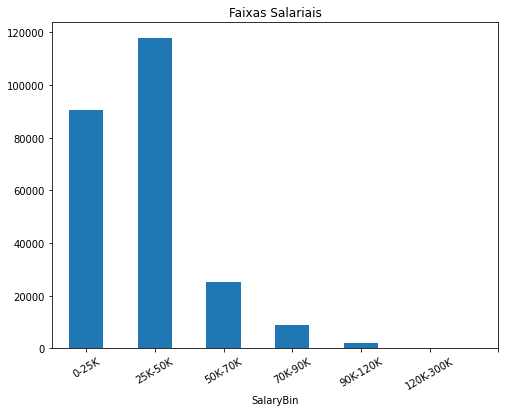

In [130]:
plt.figure(figsize=(8,6))
df_tmp.groupby('SalaryBin')['LocationNormalized'].count().plot.bar()
plt.title("Faixas Salariais")
plt.xticks([0,1,2,3,4,5,6],['0-25K','25K-50K','50K-70K','70K-90K','90K-120K','120K-300K'], rotation=30)
plt.show()

### Usando Vetorização de palavras para verificar a coluna Title - Cargo

* Criando um vetorizador de palavras e aplicando na coluna Title.

In [131]:
# Importando as bibliotecas
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Criando o vetorizador com n-gram de 1 a 3
cv = CountVectorizer(stop_words='english', ngram_range=(2,2),) #min_df=0.02)

cv.fit(df_tmp.Title)

CountVectorizer(ngram_range=(2, 2), stop_words='english')

* Criando um DataFrame com os dados para melhor visualização

In [ ]:
cargos = pd.DataFrame(cv.transform(df_tmp.Title).todense(), columns=cv.get_feature_names())

In [ ]:
cargos

In [ ]:
obs_palavras = pd.concat([palavrasCargos, df_tmp.SalaryBin], axis=1)

obs_palavras.head()

In [ ]:
for i in range(0,6) : 
  contadorPalavras = obs_palavras[obs_palavras['SalaryBin']==i].sum(axis=0)
  print(f'Faixa Salarial de {intervalosSalariais[i]}K até {intervalosSalariais[i+1]}K anual, ocorrências de palavras: ')
  palavrasComuns = contadorPalavras.sort_values(ascending=False)
  print(palavrasComuns)

### Processamento do texto 

* Primeiramente importaremos as bibliotecas usadas

In [ ]:
import nltk
nltk.download('stopwords')
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import string
from nltk.probability import FreqDist

* Criando funções para a limpeza do texto

In [ ]:
# criando a função para tokenizar texto
def tokenizaTexto(x) :
  # Criando uma lista para receber a saida com o texto já 'tokenizado'
  saida = []
  # Gerando um padrão para a expressão regular ser aplicada
  padrao = "([a-zA-Z]+(?:'[a-z]+)?)"
  # Criando uma lista com as Stop Words, números e pontos
  listaStopWords = stopwords.words('english')
  listaStopWords += list(string.punctuation)
  listaStopWords += ['0','1','2','3','4','5','6','8','9']

  # Percorrendo o texto passado.
  for txt in x:
    # Alocando o texto com a primeira filtragem.
    txt_tokens_raw = nltk.regexp_tokenize(txt, padrao)
    # Padronizando o texto
    txt_tokens_min =[palavra.lower() for palavra in txt_tokens_raw]
    # Retirando simbolos e números.
    txt_words_stopped = [palavra for palavra in txt_tokens_min if palavra not in listaStopWords]
    saida.append(txt_words_stopped)
  # Gerando a saída com o texto tokenizado
  return pd.Series(saida)

* Tokenizando o texto as colunas Title.

In [ ]:
cargo_tokens = tokenizaTexto(df_tmp['Title'])
desc_tokens = tokenizaTexto(df_tmp['FullDescription'])

In [ ]:
cargo_tokens

* Colocando os tokens em uma lista para verificar a frequência de cada um.

In [ ]:
cargo_tokens = [palavra for trabalho in cargo_tokens for palavra in trabalho]

In [ ]:
desc_tokens = [palavra for descricao in desc_tokens for palavra in descricao]

* Verificando as frequências de cada palavra na coluna Title e FullDescription

In [ ]:
cargo_tokens_freq = FreqDist(cargo_tokens)
cargo_tokens_freq.most_common(100)

* Quantidade total de palavras em todos os anúncios

In [ ]:
len(cargo_tokens_freq)

* **Normalização da Frequência de palavras** : Divide-se a frequência de cada palavra pelo número total de palavras.

In [ ]:
totalPalavras = sum(cargo_tokens_freq.values())
top100_cargos = cargo_tokens_freq.most_common(100)

In [ ]:
print(f'Palavra               Frequencia Normalizada')
for palavra in top100_cargos : 
  freqNormal = palavra[1]/totalPalavras
  print(f'{palavra[0]}   ------------   {freqNormal:.4}')

* Pode-se observar que com o N-gram com uma única palavra não ficou bom seu aproveitamento, portanto será partido para a criação de um bi-grama ou tri-grama.

### Criando Tri-gramas para validação no texto da coluna Title

* Importando bibliotecas necessárias

In [ ]:
from nltk.collocations import *
from nltk import ngrams

In [ ]:
tri = nltk.ngrams(cargo_tokens,3)

In [ ]:
score = 

In [ ]:
trigram_ = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(cargo_tokens)
score = finder.score_ngrams(trigram_.raw_freq)

In [ ]:
score[0:30]

### Criando uma núvem de palavras com os Cargos
* Importando as bibliotecas necessárias

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#Alocando o texto da coluna Title em uma variável
text = " ".join(descricao for descricao in df_tmp['Title'])

#Criando uma lista de stopwords.
stopwords = set(STOPWORDS)

# Criando a núvem de palavras
wordcloud = WordCloud(stopwords = stopwords,max_font_size=50, max_words=100, background_color='white').generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()